# 0.) Import and Clean data

In [66]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import recall_score

In [68]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [69]:
df = pd.read_csv("/content/gdrive/MyDrive/Econ441B/bank-additional-full.csv", sep = ";")

In [70]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [71]:
df = df.drop(["default", "pdays",	"previous",	"poutcome",	"emp.var.rate",	"cons.price.idx",	"cons.conf.idx",	"euribor3m",	"nr.employed"], axis = 1)
df = pd.get_dummies(df, columns = ["loan", "job","marital","housing","contact","day_of_week", "campaign", "month", "education"],drop_first = True)


In [72]:
df.head()

,age,duration,y,loan_unknown,loan_yes,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_nov,month_oct,month_sep,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,56,261,no,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,57,149,no,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,37,226,no,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,40,151,no,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,56,307,no,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [73]:
y = pd.get_dummies(df["y"], drop_first = True)
X = df.drop(["y"], axis = 1)

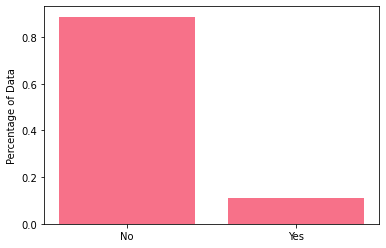

In [74]:
obs = len(y)
plt.bar(["No","Yes"],[len(y[y.yes==0])/obs,len(y[y.yes==1])/obs])
plt.ylabel("Percentage of Data")
plt.show()

In [75]:
# Train Test Split
X_train, X_test, y_train0, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler().fit(X_train)

X_scaled = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#1.) Based on the visualization above, use your expert opinion to transform the data based on what we learned this quarter

In [76]:
###############
###TRANSFORM###
###############
from imblearn.over_sampling import RandomOverSampler
from sklearn.datasets import make_classification

oversampler = RandomOverSampler()
X_scaled, y_train= oversampler.fit_resample(X_scaled, y_train0)

# 2.) Build and visualize a decision tree of Max Depth 3. Show the confusion matrix.

In [77]:
dtree = DecisionTreeClassifier(max_depth = 3)
dtree.fit(X_scaled, y_train)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'duration <= -0.032\ngini = 0.5\nsamples = 51160\nvalue = [25580, 25580]\nclass = No'),
 Text(0.25, 0.625, 'duration <= -0.493\ngini = 0.375\nsamples = 24045\nvalue = [18034, 6011]\nclass = No'),
 Text(0.125, 0.375, 'month_mar <= 4.161\ngini = 0.2\nsamples = 11123\nvalue = [9867, 1256]\nclass = No'),
 Text(0.0625, 0.125, 'gini = 0.168\nsamples = 10776\nvalue = [9776, 1000]\nclass = No'),
 Text(0.1875, 0.125, 'gini = 0.387\nsamples = 347\nvalue = [91, 256]\nclass = Yes'),
 Text(0.375, 0.375, 'contact_telephone <= 0.283\ngini = 0.465\nsamples = 12922\nvalue = [8167, 4755]\nclass = No'),
 Text(0.3125, 0.125, 'gini = 0.497\nsamples = 9272\nvalue = [4970, 4302]\nclass = No'),
 Text(0.4375, 0.125, 'gini = 0.217\nsamples = 3650\nvalue = [3197, 453]\nclass = No'),
 Text(0.75, 0.625, 'duration <= 1.029\ngini = 0.402\nsamples = 27115\nvalue = [7546, 19569]\nclass = Yes'),
 Text(0.625, 0.375, 'contact_telephone <= 0.283\ngini = 0.482\nsamples = 14366\nvalue = [5815, 8551]\nclass

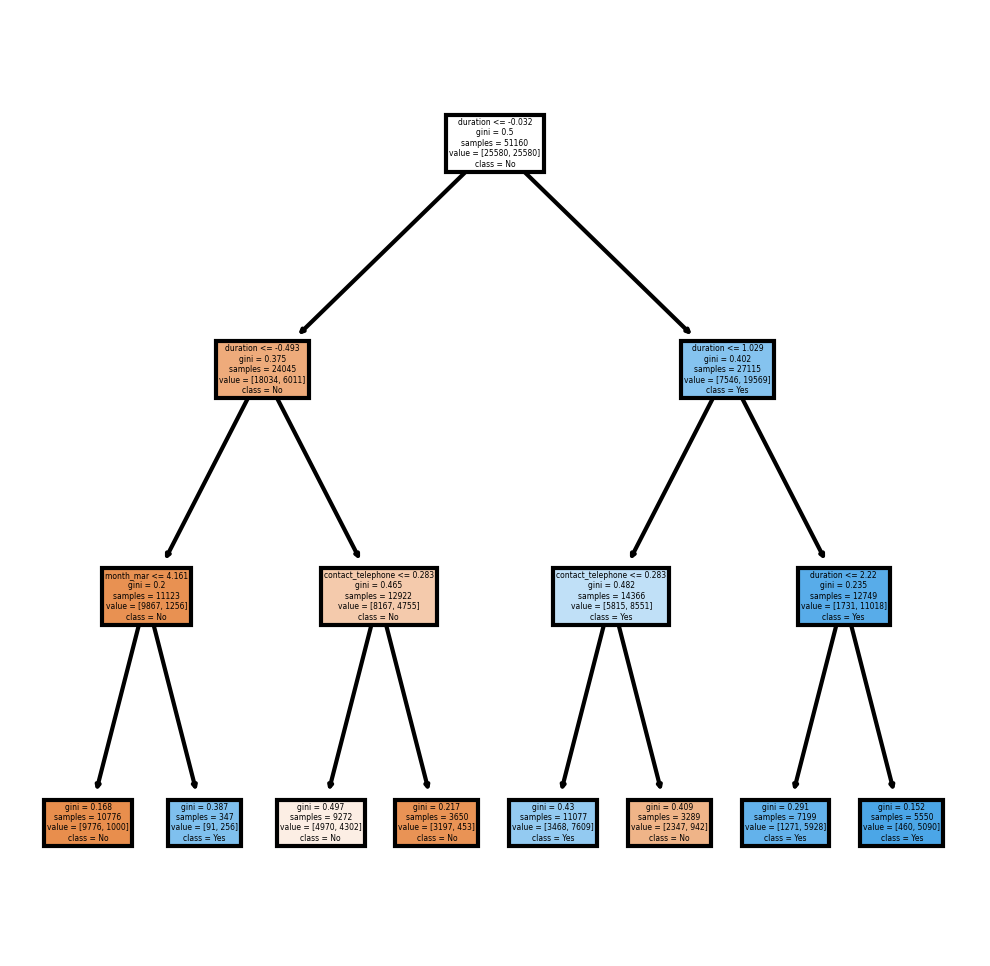

In [78]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
plot_tree(dtree, filled = True, feature_names = X.columns, class_names=["No","Yes"])

               
#fig.savefig('imagename.png')

# 1b.) Confusion matrix on out of sample data. Visualize and store as variable

In [79]:
y_pred = dtree.predict(X_test)
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)
sensitivity_raw=recall_score(y_test, y_pred)

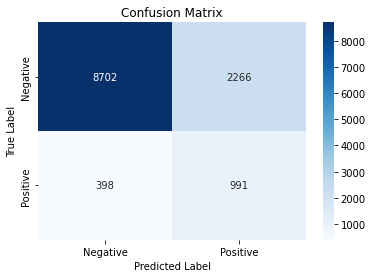

In [80]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 3.) Use bagging on your descision tree 

In [81]:

dtree = DecisionTreeClassifier(max_depth = 3)

bagging = BaggingClassifier(estimator=dtree, 
                            n_estimators=100, 
                            max_samples=0.5, 
                            max_features=1.)



bagging.fit(X_scaled, y_train)

y_pred = bagging.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.7852229505543417


In [82]:
y_pred = bagging.predict(X_test)
y_true = y_test
cm_bag = confusion_matrix(y_true, y_pred)
sensitivity_bag=recall_score(y_test, y_pred)

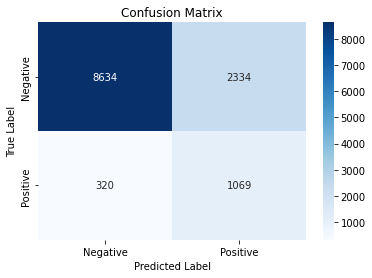

In [83]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_bag, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 4.) Boost your tree

In [84]:
from sklearn.ensemble import AdaBoostClassifier

In [85]:
dtree = DecisionTreeClassifier(max_depth=3)
adaboost = AdaBoostClassifier(base_estimator=dtree, n_estimators=50, learning_rate=0.1)

adaboost.fit(X_scaled, y_train)

y_pred = adaboost.predict(X_test)




/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [86]:
y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=uint8)

In [87]:
y_pred = adaboost.predict(X_test)
y_true = y_test
cm_boost = confusion_matrix(y_true, y_pred)
sensitivity_boost=recall_score(y_test, y_pred)

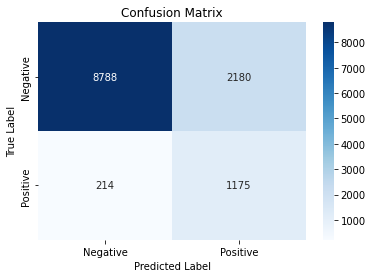

In [88]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_boost, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 5.) Create a superlearner with at least 5 base learner models. Use a logistic reg for your metalearner. Interpret your coefficients and save your CM.

In [89]:
pip install mlens

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [90]:
####IMPORT MORE BASE LEARNERS####
from mlens.ensemble import SuperLearner
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from mlens.metrics import make_scorer
# from mlens.visualization import plot_confusion_matrix
from mlens.ensemble import SuperLearner

In [91]:
### SET YOUR BASE LEARNERS
# define base learners
base_learners = [
    DecisionTreeClassifier(),
    KNeighborsClassifier(),
    RandomForestClassifier(),
    GaussianNB(),
    LogisticRegression()
]

# define meta learner
meta_learner = LogisticRegression()

# create superlearner
superlearner = SuperLearner(folds=5, random_state=42, verbose=2)
superlearner.add(base_learners)
# superlearner.add_meta(meta_learner)

# fit superlearner to training data
superlearner.fit(X_scaled, y_train)

# make predictions on test data
y_pred = superlearner.predict(X_test)



Fitting 1 layers
Processing layer-1             

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

done | 00:01:23
Fit complete                        | 00:01:24

Predicting 1 layers
Processing layer-1             done | 00:00:05
Predict complete                    | 00:00:06


In [92]:
### TRAIN YOUR METALEARNER
# make predictions on test data
base_predictions = superlearner.predict(X_scaled)


Predicting 1 layers
Processing layer-1             done | 00:00:47
Predict complete                    | 00:00:48


In [93]:
log_reg= LogisticRegression(fit_intercept=False).fit(base_predictions,y_train)
y_pred=log_reg.predict(superlearner.predict(X_test))


Predicting 1 layers


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Processing layer-1             done | 00:00:07
Predict complete                    | 00:00:08


In [94]:
### INTERPRET COEFFICIENTS

In [95]:
log_reg.coef_

array([[ 7.42628712, -7.59037201,  1.08506063, -0.24422556,  7.42628712]])

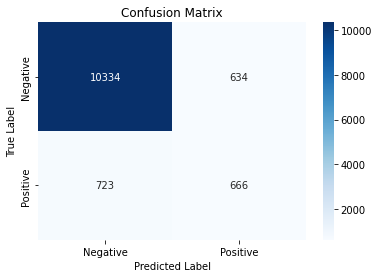

In [96]:
### MAKE, SAVE AND VISUALIZE YOUR CONFUSION MATRIX
super_learner = confusion_matrix(y_test, y_pred)
sensitivity_sl=recall_score(y_test, y_pred)

class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(super_learner, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 6.) Create a bar chart comparing decision tree, bagged, boosted and super learner Sensitivities (Out of Sample)

In [99]:
from sklearn.metrics import recall_score
# Sensitivity = true positives / (true positives + false negatives)
sensitivities = []
sensitivities.append([sensitivity_raw, sensitivity_bag, sensitivity_boost, sensitivity_sl])

sensitivities = {'Decision Tree': sensitivity_raw, 'Bagging': sensitivity_bag, 'Boosting': sensitivity_boost, 'Super Learner': sensitivity_sl}


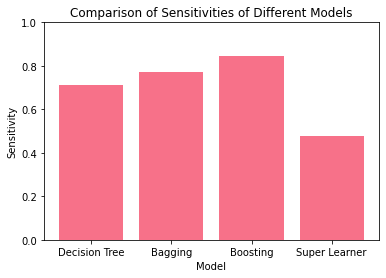

In [100]:
# create the bar chart
fig, ax = plt.subplots()
ax.bar(sensitivities.keys(), sensitivities.values())
ax.set_xlabel('Model')
ax.set_ylabel('Sensitivity')
ax.set_ylim([0, 1])
ax.set_title('Comparison of Sensitivities of Different Models')
plt.show()